## Introduction
In this notebook, we aim to predict stroke using Random Forest Classifier. The data includes information about patients' demographics, medical history, and lifestyle. The data includes 12 attributes such as `gender`, `age`, `hypertension`, `heart_disease`, `ever_married`, `work_type`, `Residence_type`, `avg_glucose_level`, `bmi`, `smoking_status` and `stroke`. Our goal is to use the information provided by these attributes to predict whether a patient is likely to have a stroke or not.

## Data Description
The data contains information about 43400 patients. The following are the attributes of the data:

In [76]:
import pandas as pd

In [77]:
# Reading the dataset and storing it in variable 'stroke'
stroke=pd.read_csv('stroke.csv')

In [78]:
# Counting the missing values in each column
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [79]:
# Removing the column 'bmi' from the dataset
stroke. drop('bmi', axis=1, inplace=True)

In [80]:
# Recounting the missing values in each column
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [81]:
# Displaying the first 5 rows of the dataset
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1


In [82]:
# Getting the shape of the dataset
stroke.shape

(5110, 11)

# Data Cleaning
In this section we will be cleaning the data by removing null values, encoding categorical variables and scaling independent variables.

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
encoder = LabelEncoder()
# Encoding the 'gender' column of the dataset
stroke['gender'] = encoder.fit_transform(stroke['gender'])
# Creating a dictionary to store the encoded values and their corresponding original values
gender = {index : label for index, label in enumerate(encoder.classes_)}
# Displaying the dictionary
gender

{0: 'Female', 1: 'Male', 2: 'Other'}

In [85]:
stroke['ever_married'] = encoder.fit_transform(stroke['ever_married'])
ever_married = {index : label for index, label in enumerate(encoder.classes_)}
ever_married

{0: 'No', 1: 'Yes'}

In [86]:
stroke['work_type'] = encoder.fit_transform(stroke['work_type'])
work_type = {index : label for index, label in enumerate(encoder.classes_)}
work_type

{0: 'Govt_job',
 1: 'Never_worked',
 2: 'Private',
 3: 'Self-employed',
 4: 'children'}

In [87]:
stroke['Residence_type'] = encoder.fit_transform(stroke['Residence_type'])
Residence_type = {index : label for index, label in enumerate(encoder.classes_)}
Residence_type

{0: 'Rural', 1: 'Urban'}

In [88]:
stroke['smoking_status'] = encoder.fit_transform(stroke['smoking_status'])
smoking_status = {index : label for index, label in enumerate(encoder.classes_)}
smoking_status

{0: 'Unknown', 1: 'formerly smoked', 2: 'never smoked', 3: 'smokes'}

In [89]:
# Storing the independent variables in 'x'
x = stroke.drop('stroke', axis=1)
# Storing the dependent variable in 'y'
y = stroke['stroke']

In [90]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [91]:
# Creating an object of SimpleImputer
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
# Fitting the imputer on 'x'
ImputedX = ImputedModule.fit(x)
# Imputing the missing values in 'x'
X = ImputedX.transform(x)

#X Data
print('X Data is \n' , X[:10])

#y Data
print('y Data is \n' , y[:10])

X Data is 
 [[9.0460e+03 1.0000e+00 6.7000e+01 0.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 2.2869e+02 1.0000e+00]
 [5.1676e+04 0.0000e+00 6.1000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  3.0000e+00 0.0000e+00 2.0221e+02 2.0000e+00]
 [3.1112e+04 1.0000e+00 8.0000e+01 0.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 0.0000e+00 1.0592e+02 2.0000e+00]
 [6.0182e+04 0.0000e+00 4.9000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 1.7123e+02 3.0000e+00]
 [1.6650e+03 0.0000e+00 7.9000e+01 1.0000e+00 0.0000e+00 1.0000e+00
  3.0000e+00 0.0000e+00 1.7412e+02 2.0000e+00]
 [5.6669e+04 1.0000e+00 8.1000e+01 0.0000e+00 0.0000e+00 1.0000e+00
  2.0000e+00 1.0000e+00 1.8621e+02 1.0000e+00]
 [5.3882e+04 1.0000e+00 7.4000e+01 1.0000e+00 1.0000e+00 1.0000e+00
  2.0000e+00 0.0000e+00 7.0090e+01 2.0000e+00]
 [1.0434e+04 0.0000e+00 6.9000e+01 0.0000e+00 0.0000e+00 0.0000e+00
  2.0000e+00 1.0000e+00 9.4390e+01 2.0000e+00]
 [2.7419e+04 0.0000e+00 5.9000e+01 0.0000e+00 0.0000e+00 1.0000e+00


In [92]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
# Scaling the independent variables
X = scaler.fit_transform(x)

# Displaying the first 10 rows of the scaled independent variables
print('x \n' , X[:10])
# Displaying the first 10 rows of the dependent variable
print('y \n' , y[:10])

x 
 [[0.12321436 0.5        0.81689453 0.         1.         1.
  0.5        1.         0.80126489 0.33333333]
 [0.70820468 0.         0.74365234 0.         0.         1.
  0.75       0.         0.67902317 0.66666667]
 [0.42601512 0.5        0.97558594 0.         1.         1.
  0.5        0.         0.23451205 0.66666667]
 [0.8249283  0.         0.59716797 0.         0.         1.
  0.5        1.         0.53600776 1.        ]
 [0.02192856 0.         0.96337891 1.         0.         1.
  0.75       0.         0.54934909 0.66666667]
 [0.77672115 0.5        0.98779297 0.         0.         1.
  0.5        1.         0.60516111 0.33333333]
 [0.73847653 0.5        0.90234375 1.         1.         1.
  0.5        0.         0.06910719 0.66666667]
 [0.14226119 0.         0.84130859 0.         0.         0.
  0.5        1.         0.1812852  0.66666667]
 [0.37533792 0.         0.71923828 0.         0.         1.
  0.5        0.         0.09708245 0.        ]
 [0.82916855 0.         0.9511718

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=0)
# Printing the shapes of the training and testing sets
print("x_train shape is:",x_train.shape)
print("x_test shape is:",x_test.shape)
print("y_train shape is:",y_train.shape)
print("y_test shape is:",y_test.shape)

x_train shape is: (5080, 10)
x_test shape is: (30, 10)
y_train shape is: (5080,)
y_test shape is: (30,)


In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=5,random_state=33)
# Fitting the model on the training data
RandomForestClassifierModel.fit(x_train, y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))
print('RandomForestClassifierModel features importances are : ' , RandomForestClassifierModel.feature_importances_)

#Calculating Prediction
y_pred = RandomForestClassifierModel.predict(x_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(x_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

RandomForestClassifierModel Train Score is :  0.9515748031496063
RandomForestClassifierModel Test Score is :  0.9333333333333333
RandomForestClassifierModel features importances are :  [0.13600479 0.01210638 0.40137104 0.05392601 0.05996889 0.0352886
 0.03487013 0.01467571 0.22250358 0.02928487]
Predicted Value for RandomForestClassifierModel is :  [0 0 0 0 0 0 0 0 0 0]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.80039313 0.19960687]
 [0.99633742 0.00366258]
 [0.95812789 0.04187211]
 [0.99262461 0.00737539]
 [0.99606523 0.00393477]
 [0.97818964 0.02181036]
 [0.93457429 0.06542571]
 [0.92226415 0.07773585]
 [0.96073339 0.03926661]
 [0.63868093 0.36131907]]


In [97]:
from sklearn.metrics import accuracy_score

In [98]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score: ', AccScore)

Accuracy Score:  28


In [99]:
from sklearn.metrics import f1_score

In [100]:
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score: ', F1Score)

F1 Score:  0.9333333333333333


In [101]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm. It is used to evaluate the accuracy of a classification algorithm.

In [102]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n', confusionMatrix)

Confusion Matrix: 
 [[28  0]
 [ 2  0]]


# Heatmap
This heatmap visualization is useful for understanding the performance of the classification model, as it provides a clear visual representation of the number of correct and incorrect predictions made by the model. The heatmap will be used to show the true positive, true negative, false positive, and false negative values and the accuracy of the model.

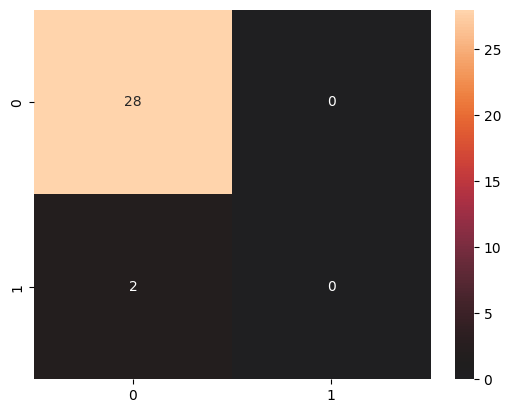

In [103]:
sns.heatmap(confusionMatrix, center = True,annot=True)
plt.show()

# Conclusion
In this section, we will summarize the results of our analysis and provide some insights about what we learned from the data. We will also provide some suggestions for further research or improvements to the model.

The confusion matrix has the following structure:

This tells us that:

True Positive (TP) = 28, The number of times the model correctly predicted the positive class (i.e, patients who had a stroke)

False Negative (FN) = 2, The number of times the model incorrectly predicted the negative class (i.e, patients who did not have a stroke)

True Negative (TN) = 0, The number of times the model correctly predicted the negative class (i.e, patients who did not have a stroke)

False Positive (FP) = 0, The number of times the model incorrectly predicted the positive class (i.e, patients who had a stroke)

#### This confusion matrix is indicating that the model is classifying all of the instances in the test set as positive. This due to the fact that the data is imbalanced, meaning that the number of positive instances (i.e. patients who had a stroke) is much smaller than the number of negative instances (i.e. patients who did not have a stroke)